## NAIVE BAYES ON DONORS CHOOSE DATASET

## 1.1 Loading Data

In [ ]:
import pandas
data = pandas.read_csv(r'C:\Users\NADEEM\Downloads\preprocessed_data.csv', nrows=50000)
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [ ]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y) 
 # stratify ensures the same ratio of class label in these three set
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer1 = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000) # ngram_range : we want no. of words of length 1-4
vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer1.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer1.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer1.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer01 = TfidfVectorizer(min_df=10)
vectorizer01.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer01.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer01.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer01.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(22445, 8802) (22445,)
(11055, 8802) (11055,)
(16500, 8802) (16500,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3> Encoding Categorical Features:  Teacher Prefix</h3>

In [ ]:
vectorizer2 = CountVectorizer()
vectorizer2.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer2.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer2.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer2.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3> Encoding Categorical Features:  Project Grade Category</h3>

In [ ]:
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer3.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer3.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer3.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3>Encoding Categorical Features: School State</h3>

In [ ]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer4.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer4.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer4.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>Encoding Categorical Features: Clean Categories</h3>

In [ ]:
vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_ohe = vectorizer5.transform(X_train['clean_categories'].values)
X_cv_clean_ohe = vectorizer5.transform(X_cv['clean_categories'].values)
X_test_clean_ohe = vectorizer5.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_cv_clean_ohe.shape, y_cv.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>Encoding Categorical Features: Clean Subcategories</h3>

In [ ]:
vectorizer6 = CountVectorizer()
vectorizer6.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_ohe = vectorizer6.transform(X_train['clean_subcategories'].values)
X_cv_clean_sub_ohe = vectorizer6.transform(X_cv['clean_subcategories'].values)
X_test_clean_sub_ohe = vectorizer6.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_sub_ohe.shape, y_train.shape)
print(X_cv_clean_sub_ohe.shape, y_cv.shape)
print(X_test_clean_sub_ohe.shape, y_test.shape)
print(vectorizer6.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3> Encoding Categorical Features: Price</h3>

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h3> Encoding Categorical Features: No. of Teacher who previously posted projects </h3>

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_project_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_previous_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_project_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_previous_project_norm.shape, y_train.shape)
print(X_cv_previous_project_norm.shape, y_cv.shape)
print(X_test_previous_project_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### Concatinating all the features

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
Set1_tr = hstack((X_train_essay_bow, X_train_teacher_ohe, X_train_grade_ohe, X_train_state_ohe, X_train_clean_ohe, X_train_clean_sub_ohe, X_train_price_norm, X_train_previous_project_norm)).tocsr()
Set1_cr = hstack((X_cv_essay_bow, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_state_ohe, X_cv_clean_ohe, X_cv_clean_sub_ohe, X_cv_price_norm, X_cv_previous_project_norm)).tocsr()
Set1_te = hstack((X_test_essay_bow, X_test_teacher_ohe, X_test_grade_ohe, X_test_state_ohe, X_test_clean_ohe, X_test_clean_sub_ohe, X_test_price_norm, X_test_previous_project_norm)).tocsr()

print("Final Data matrix")
print(Set1_tr.shape, y_train.shape)
print(Set1_cr.shape, y_cv.shape)
print(Set1_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 5101) (22445,)
(11055, 5101) (11055,)
(16500, 5101) (16500,)


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
Set2_tr = hstack((X_train_essay_tfidf, X_train_teacher_ohe, X_train_grade_ohe, X_train_state_ohe, X_train_clean_ohe, X_train_clean_sub_ohe, X_train_price_norm, X_train_previous_project_norm)).tocsr()
Set2_cr = hstack((X_cv_essay_tfidf, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_state_ohe, X_cv_clean_ohe, X_cv_clean_sub_ohe, X_cv_price_norm, X_cv_previous_project_norm)).tocsr()
Set2_te = hstack((X_test_essay_tfidf, X_test_teacher_ohe, X_test_grade_ohe, X_test_state_ohe, X_test_clean_ohe, X_test_clean_sub_ohe, X_test_price_norm, X_test_previous_project_norm)).tocsr()

print("Final Data matrix")
print(Set1_tr.shape, y_train.shape)
print(Set1_cr.shape, y_cv.shape)
print(Set1_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 5101) (22445,)
(11055, 5101) (11055,)
(16500, 5101) (16500,)


## 2. Applying Naive Bayes on BOW, SET 1

### HYPER PARAMETER TUNING (SET  1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.23it/s]


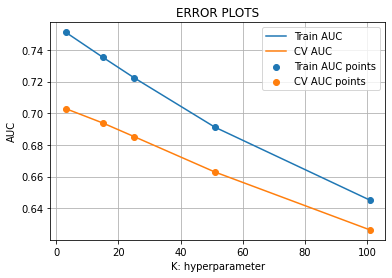

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh =  MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    # n_jobs=-1  means we want to use all the course of the cpu to run the code faster
    neigh.fit(Set1_tr, y_train)

    y_train_pred = neigh.predict_proba(Set1_tr)[:,1]
    y_cv_pred = neigh.predict_proba(Set1_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

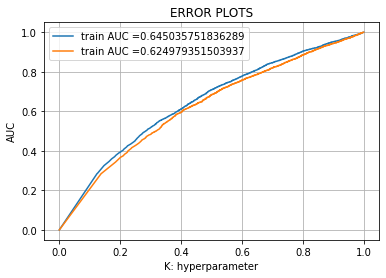

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_k = 101
neigh =  MultinomialNB(alpha=best_k,class_prior=[0.5,0.5])
neigh.fit(Set1_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Set1_tr)[:,1]    
y_test_pred = neigh.predict_proba(Set1_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

Set1_train_auc = str(auc(train_fpr, train_tpr))
Set1_test_auc = str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
import numpy as np
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3786042359156359 for threshold 1.0
Train confusion matrix
[[ 2200  1395]
 [ 7188 11662]]
Test confusion matrix
[[1490 1152]
 [5433 8425]]


## Applying Naive Bayes on BOW, SET 2

### HYPERPARAMETER TUNING SET 2

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.99it/s]


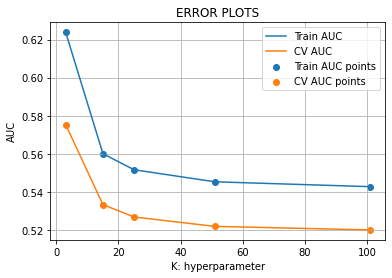

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh =  MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    # n_jobs=-1  means we want to use all the course of the cpu to run the code faster
    neigh.fit(Set2_tr, y_train)

    y_train_pred = neigh.predict_proba(Set2_tr)[:,1]
    y_cv_pred = neigh.predict_proba(Set2_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

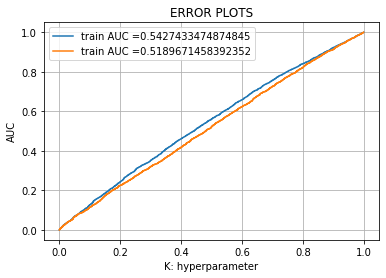

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_k = 101
neigh =  MultinomialNB(alpha=best_k,class_prior=[0.5,0.5])
neigh.fit(Set2_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Set2_tr)[:,1]    
y_test_pred = neigh.predict_proba(Set2_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

Set2_train_auc = str(auc(train_fpr, train_tpr))
Set2_test_auc = str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
import numpy as np
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.2729891575021305 for threshold 1.0
Train confusion matrix
[[ 1751  1844]
 [ 8285 10565]]
Test confusion matrix
[[1266 1376]
 [6142 7716]]


###  Top 10 important features of positive class from SET 1

In [ ]:
best_k = 101
nb_alp = MultinomialNB(alpha =best_k ,class_prior=[0.5,0.5])
nb_alp.fit(Set1_tr, y_train)

MultinomialNB(alpha=101, class_prior=[0.5, 0.5])

In [ ]:
neg_class_prob_sorted = nb_alp.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = nb_alp.feature_log_prob_[1, :].argsort()

In [ ]:
# https://stackoverflow.com/questions/14131615/possible-to-append-multiple-lists-at-once-python
from itertools import chain
Stacked_Feature_list = list(chain(vectorizer1.get_feature_names(),vectorizer2.get_feature_names(),vectorizer3.get_feature_names(),\
                                  vectorizer4.get_feature_names(),vectorizer5.get_feature_names(),vectorizer6.get_feature_names()))

In [ ]:
import numpy as np
print("The words with higest importance in Postive class is")
print(np.take(Stacked_Feature_list,pos_class_prob_sorted[0:10]))
print("*"*20)
print("The words with higest importance in Negative class is")
print(np.take(Stacked_Feature_list, neg_class_prob_sorted[0:10]))

The words with higest importance in Postive class is
['dr' 'warmth' 'care_hunger' 'warmth' 'care_hunger' 'wy' 'vt' 'nd'
 'financialliteracy' 'economics']
********************
The words with higest importance in Negative class is
['warmth' 'care_hunger' 'wy' 'warmth' 'care_hunger' 'dr' 'nd' 'ri'
 'economics' 'vt']


## 3. Summary

In [ ]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Train AUC", "TEST AUC"]


x.add_row(["BOW", "Naive Bayes", best_k , Set1_train_auc , Set1_test_auc])
x.add_row([" ", " ", " ", " "," "])
x.add_row(["TFIDF", "Naive Bayes", best_k , Set2_train_auc , Set2_test_auc])

print(x)

+------------+-------------+-----------------+--------------------+--------------------+
| Vectorizer |    Model    | Hyper Parameter |     Train AUC      |      TEST AUC      |
+------------+-------------+-----------------+--------------------+--------------------+
|    BOW     | Naive Bayes |       101       | 0.645035751836289  | 0.624979351503937  |
|            |             |                 |                    |                    |
|   TFIDF    | Naive Bayes |       101       | 0.5427433474874845 | 0.5189671458392352 |
+------------+-------------+-----------------+--------------------+--------------------+
